In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:/Users/pclenovo/Documents/hong kong proyect/TSLA.csv')
#First of all i am showing the data from the TESLA CSV
print(df)

            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  41094000  
3        3.840000  25699000

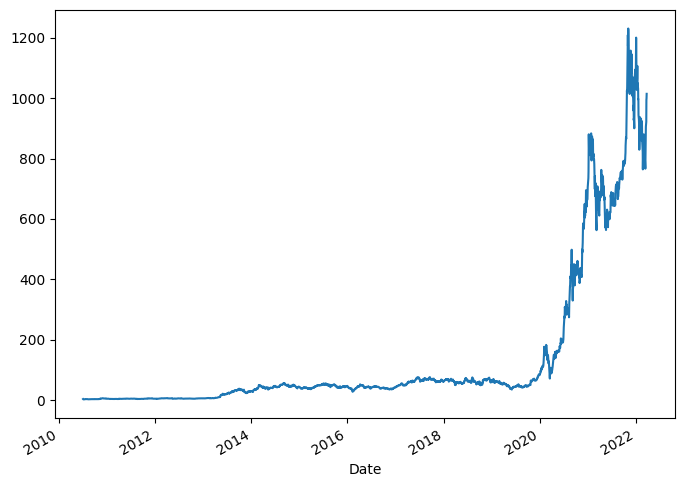

In [2]:
#Here i am showing the plot from the Close stock price
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'date' column as the index
df.set_index('Date', inplace=True)

# Now you can use slicing to access specific dates
df_2020 = df['2010-07-01':'2022-03-24']


plt.figure(figsize=(8, 6))
 
df.loc['2010-07-01':'2022-03-24','Close'].plot() 
plt.show()


In [3]:
#The Price difference between the first register vs the last one
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']

print(df['PriceDiff'].loc['2010-07-02'])

#Last register is positive!
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']

print(df['PriceDiff'].loc['2022-03-23'])

-0.6179999999999999
14.80999799999995


In [4]:
#Daily Return in the first day is negative and the last one is positive
df['Return'] = df['PriceDiff'] /df['Close']
#Daylt return = Price Difference / Close Price
print(df['Return'].loc['2010-07-23'])

#Last One
df['Return'] = df['PriceDiff'] /df['Close']
print(df['Return'].loc['2022-03-23'])


-0.015969938938468674
0.014823190862215185


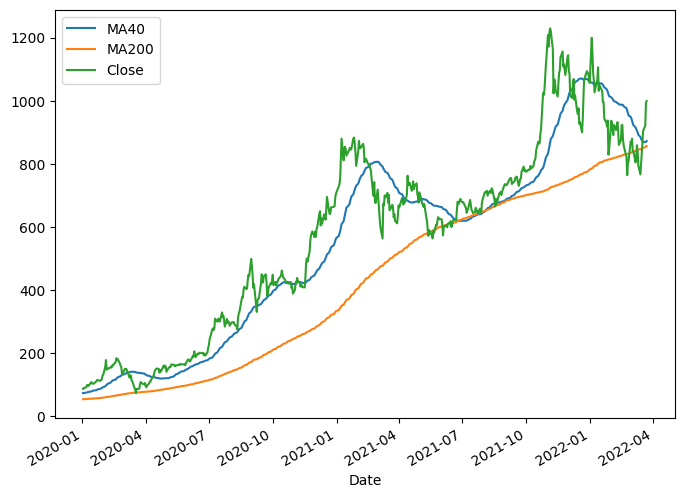

In [5]:
df['ma40'] = df['Close'].rolling(40).mean()
df['ma200'] = df['Close'].rolling(200).mean()

#plot the moving average
plt.figure(figsize=(8, 6))
df['ma40'].loc['2020-01-01':'2022-03-23'].plot(label='MA40')
df['ma200'].loc['2020-01-01':'2022-03-23'].plot(label='MA200')
df['Close'].loc['2020-01-01':'2022-03-23'].plot(label='Close')
plt.legend()
plt.show()

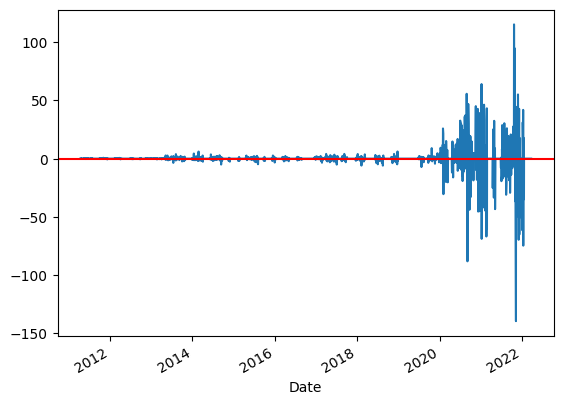

In [6]:
#For trading strategy, we are making a Moving Avergae of 10 and 50
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df = df.dropna()
df.head()
#Plot Profit Loss
df['Shares'] = [1 if df.loc[ei, 'MA10']>df.loc[ei, 'MA50'] else 0 for ei in df.index]

df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares']==1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='red')

Text(0.5, 1.0, 'Total money you win is 622.2899580000001')

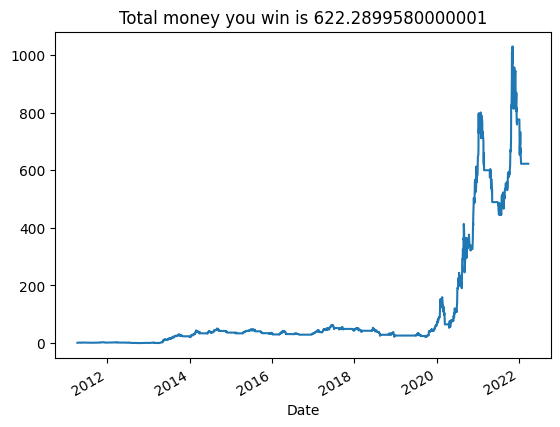

In [7]:
df['wealth'] = df['Profit'].cumsum()
df.tail()
df['wealth'].plot()
plt.title('Total money you win is {}'.format(df.loc[df.index[-2], 'wealth']))

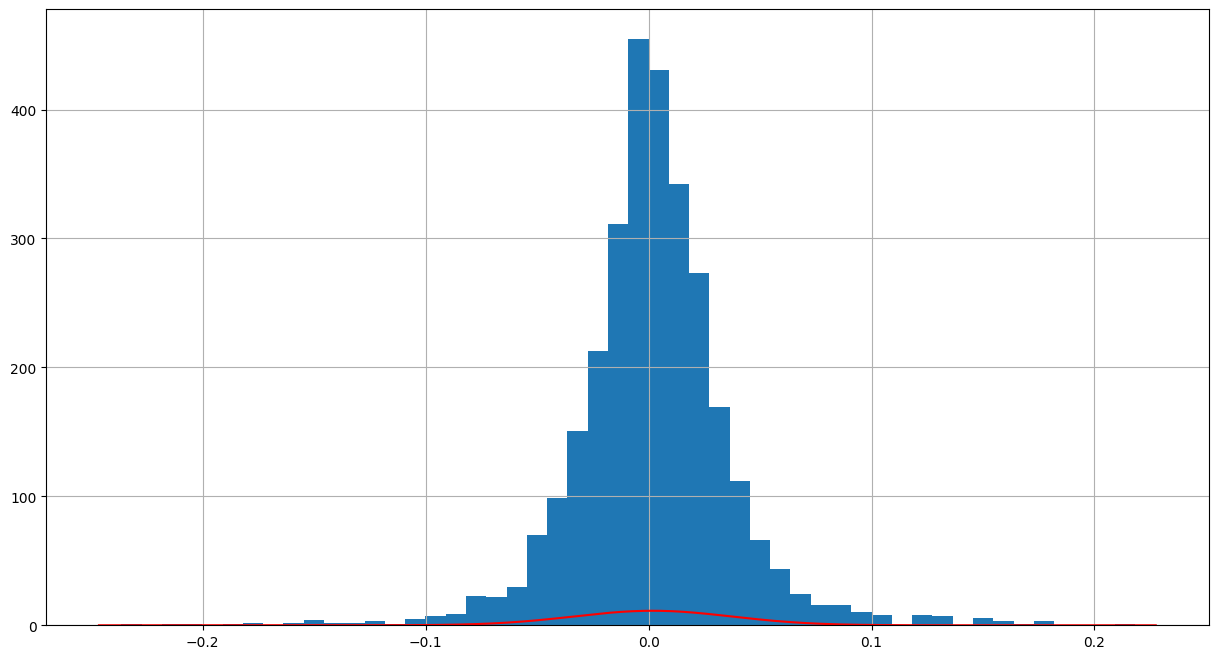

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'C:/Users/pclenovo/Documents/hong kong proyect/TSLA.csv')

df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
from scipy.stats import norm
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(df['LogReturn'].min()-0.01, df['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [11]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.50, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  7.599684648919877e-46


In [16]:
# drop over 40% in 360 days
mu360 = 360*mu
sigma360 = (360**0.5) * sigma
print('The probability of dropping over 40% in 360 days is ', norm.cdf(-0.4, mu360, sigma360))

The probability of dropping over 40% in 360 days is  0.05866624121793279


In [13]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.05646012331161487


In [14]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.05646012331161487
95% quantile  0.06008621956874173


In [18]:
df['logReturn'] = np.log(df['Close'].shift(-1)) - np.log(df['Close'])# Lets build 85% confidence interval for log return
sample_size = df['logReturn'].shape[0]
sample_mean = df['logReturn'].mean()
sample_std = df['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(.15)
z_right = norm.ppf(.85)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

# 85% confidence interval tells you that there will be 85% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('85% confidence interval is ', (interval_left, interval_right))

85% confidence interval is  (0.001137695524705805, 0.002488400732421085)
